In [ ]:
%matplotlib notebook
from measurement_session import *
from peak_detection import *
import matplotlib.pyplot as plt

# Peak Detection Algorithm Comparison

In [34]:
session_file = '/home/martin/Downloads/1589401905 (1).st'
session = load_session_from_file(session_file)
#session = prune_overflown_session(session)
#session = prune(session, 10, 50)
session

{'sessionStartTime': 1589401905,
 'startIndex': 0,
 'values': array([15, 15, 15, ..., 18, 17, 16], dtype=int16)}

In [35]:
#values[8000:8005]

<IPython.core.display.Javascript object>


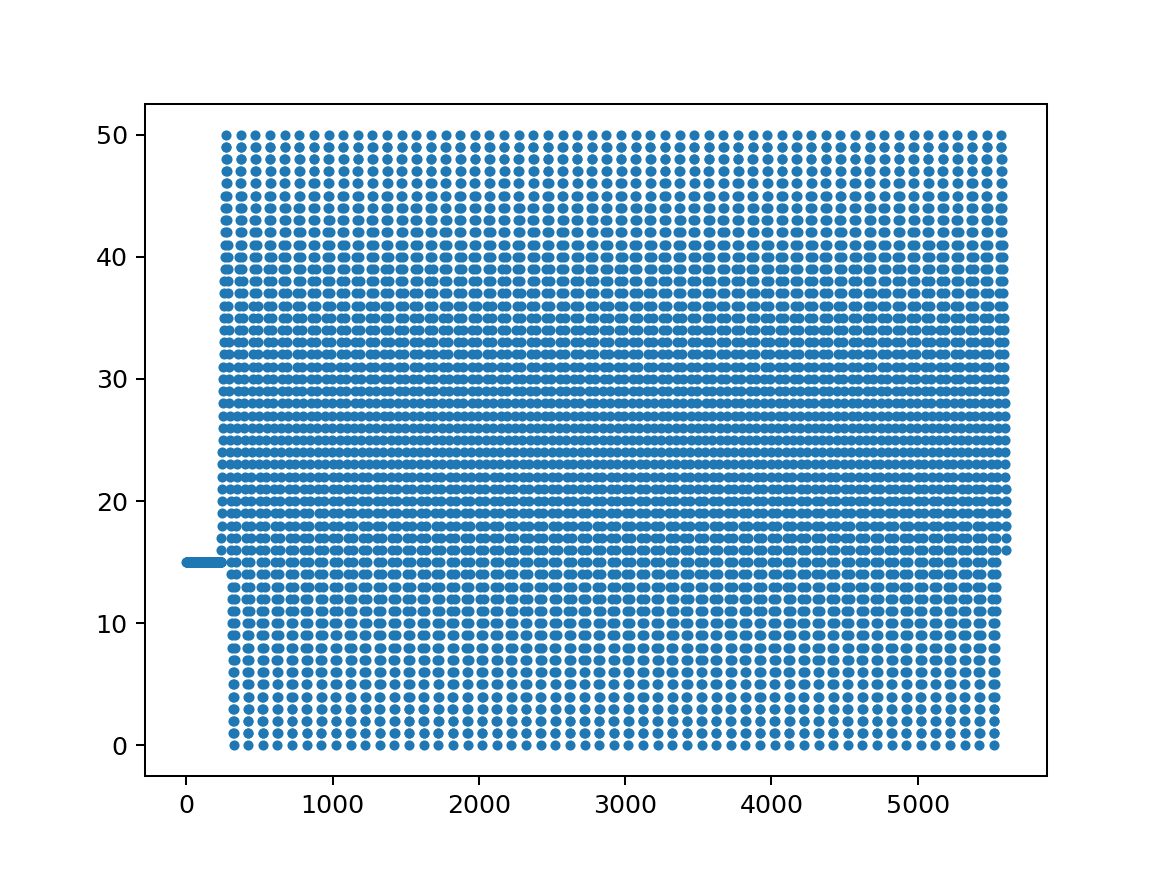

In [36]:
values = session['values']
plt.plot(values, '.')

### Simple detection

In [ ]:
peak_detector_simple = PeakDetectorSimple(threshold=5000)
peaks = detect_peaks(session['values'], peak_detector_simple)

In [ ]:
plt.figure()
plt.plot(session['timestamps'], session['values'], '-', label='data')
plt.plot(session['timestamps'][peaks], session['values'][peaks], 'o', 
         label=f"Simple {peak_detector_simple.threshold}")
plt.title("Peak detection")
plt.show()

In [ ]:
for threshold in (500, 1000, 2000, 3000, 5000, 6000, 7000, 8000):
    peak_detector_simple = PeakDetectorSimple(threshold=threshold)
    peaks = detect_peaks(session['values'], peak_detector_simple)
    print(f"{threshold} :  {len(peaks)}")

## Complex peak detection

In [ ]:
lag = 20
peak_detector_zscore = PeakDetectorZScore(lag=lag, threshold=2, influence=0.1)
peaks = detect_peaks(session['values'], peak_detector_zscore)
up_down = np.array([0] * lag + peak_detector_zscore.up_down_signal)
up_down[up_down < 0] = -10
up_down[up_down > 0] = 10000
avgs = np.array([0] * lag + peak_detector_zscore._filter.means)
filtered = np.array([0] * lag + peak_detector_zscore._filter.filtered)
upper_bounds = np.array([0] * lag + peak_detector_zscore._filter.upper_bounds)

In [ ]:
plt.figure()
plt.plot(session['timestamps'], session['values'], 'x-', label='data')
plt.plot(session['timestamps'], filtered, 'x', label='filtered')
#plt.plot(session['timestamps'], up_down, '-', label='up_down')
plt.plot(session['timestamps'], avgs, '-', label='avg')
#plt.plot(session['timestamps'], upper_bounds, '-', label='uppe bounds')

plt.plot(session['timestamps'][peaks], session['values'][peaks], 'o', 
         label=f"Peaks")
plt.title("Peak detection")
plt.legend()
plt.show()